In this notebook, we will build

    1. A Decision Tree model
    
    2. A Random Forest Model 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Columns Details

age: person's age

gender (1 = male, 0 = female) 

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) 

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital) 

chol: The person's cholesterol measurement in mg/dl 

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) 

thalach: The person's maximum heart rate achieved exang: Exercise induced angina (1 = yes; 0 = no) 

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here) 

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping) 

ca: The number of major vessels (0-3) 

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) 

target: Heart disease (0 = no, 1 = yes)

thal, thalach, restecg ---> trestbps is a value this is an example of regression 

age, gender, cp        ---> heart disease, yes or no, this means it is a classification 

In [4]:
df.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

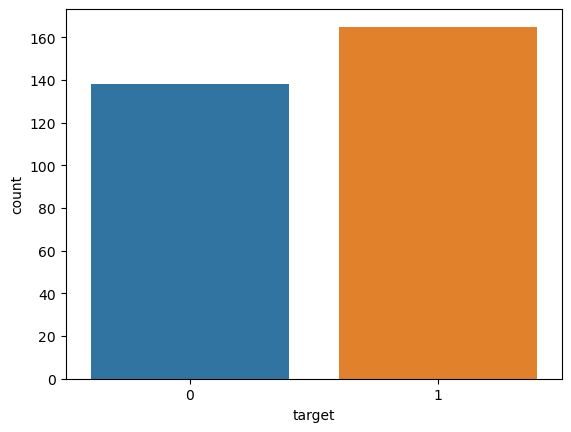

In [9]:
"""
Plotting the target values. The target value of "0" refers 
to no disease and a value of "1" refers to disease.
"""

sns.countplot(x="target", data=df)

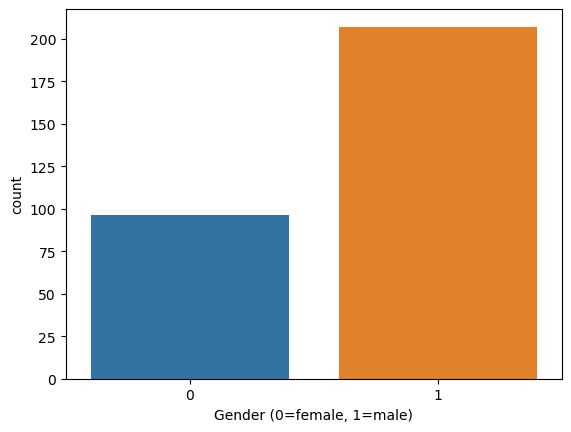

In [10]:
"""
Plotting number of males vs number of females. Value "1"
represents a male and "0" represents female.
"""

sns.countplot(x="gender", data=df)
plt.xlabel("Gender (0=female, 1=male)")
plt.show()

Note: here df is our data frame,

df["gender"] or df.gender represent the gender column

df["gender"]==1, df.gender==1

In [12]:
# Here gender=1(male) and target =1(have disease)

male_disease = df[(df.gender==1) & (df.target==1)]   

# Here gender=1(male) and target =0(have no disease )

male_no_disease = df[(df.gender==1) & (df.target==0)]       

print(len(male_disease),"male_disease")
print(len(male_no_disease),"male_no_disease")

93 male_disease
114 male_no_disease


C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


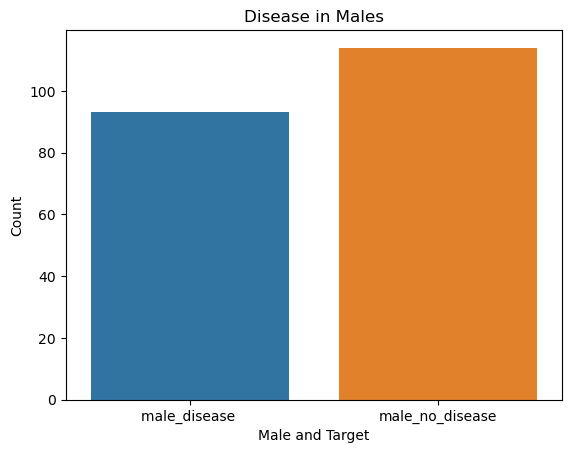

In [13]:
a=len(male_disease)
b=len(male_no_disease)
sns.barplot(x=['male_disease ','male_no_disease'],y=[a,b])
plt.xlabel('Male and Target')
plt.ylabel('Count')
plt.title('Disease in Males')
plt.show()

In [14]:
# Here gender=0(female) and target =1(have disease)

female_disease = df[(df.gender==0) & (df.target==1)]       

# Here gender=0(female) and target =0(have no disease )
female_no_disease = df[(df.gender==0) & (df.target==0)]       

print(len(female_disease),"female_disease")
print(len(female_no_disease),"female_no_disease")

72 female_disease
24 female_no_disease


C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


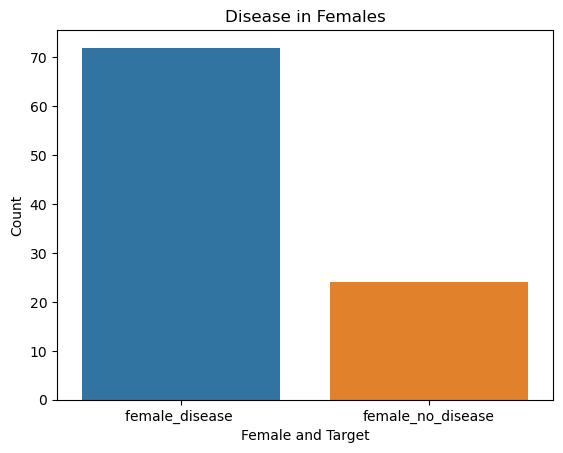

In [15]:
c=len(female_disease)
d=len(female_no_disease)
sns.barplot(x=['female_disease ','female_no_disease'],y=[c,d])
plt.xlabel('Female and Target')
plt.ylabel('Count')
plt.title('Disease in Females')
plt.show()

In [17]:
"""
Let's do chest pain analysis
"""
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

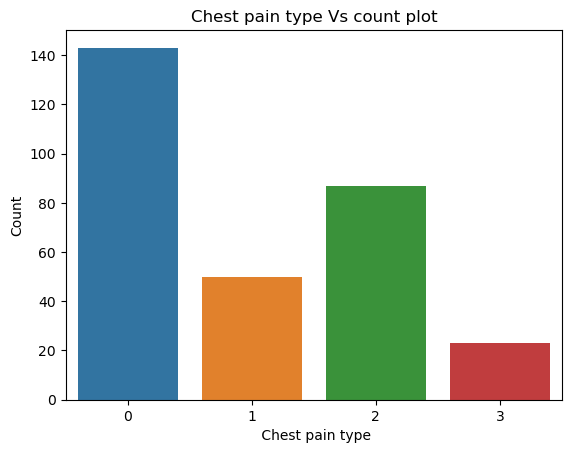

In [18]:
"""
Plotting chest pain according to severity
"""
sns.countplot(x='cp', data=df)
plt.xlabel(" Chest pain type")
plt.ylabel("Count")
plt.title("Chest pain type Vs count plot")
plt.show()

In [19]:
"""
Within each chest pain category, let's see how many had 
the disease and how many didn't have the disease.
"""
print(len(df[(df.cp==0)&(df.target==0)]),"=cp_zero_target_zero")
print(len(df[(df.cp==0)&(df.target==1)]),"=cp_zero_target_one")
print(len(df[(df.cp==1)&(df.target==0)]),"=cp_one_target_zero")
print(len(df[(df.cp==1)&(df.target==1)]),"=cp_one_target_one")

104 =cp_zero_target_zero
39 =cp_zero_target_one
9 =cp_one_target_zero
41 =cp_one_target_one


Text(0.5, 1.0, 'Chest_type_1 Vs count plot')

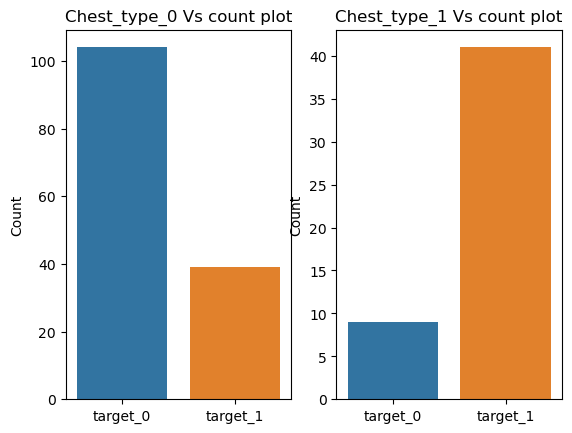

In [18]:
target_0=len(df[(df.cp==0)&(df.target==0)])
target_1=len(df[(df.cp==0)&(df.target==1)])
plt.subplot(1,2,1)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_0 Vs count plot")


target_0=len(df[(df.cp==1)&(df.target==0)])
target_1=len(df[(df.cp==1)&(df.target==1)])
plt.subplot(1,2, 2)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_1 Vs count plot")

In [20]:
print(len(df[(df.cp==0)&(df.target==0)]),"=cp_zero_target_zero")
print(len(df[(df.cp==0)&(df.target==1)]),"=cp_zero_target_one")
print(len(df[(df.cp==1)&(df.target==0)]),"=cp_one_target_zero")
print(len(df[(df.cp==1)&(df.target==1)]),"=cp_one_target_one")


print(len(df[(df.cp==2)&(df.target==0)]),"=cp_two_target_zero")
print(len(df[(df.cp==2)&(df.target==1)]),"=cp_two_target_one")
print(len(df[(df.cp==3)&(df.target==0)]),"=cp_three_target_zero")
print(len(df[(df.cp==3)&(df.target==1)]),"=cp_three_target_one")

104 =cp_zero_target_zero
39 =cp_zero_target_one
9 =cp_one_target_zero
41 =cp_one_target_one
18 =cp_two_target_zero
69 =cp_two_target_one
7 =cp_three_target_zero
16 =cp_three_target_one


C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0.5, 1.0, 'Chest_type_3 Vs count plot')

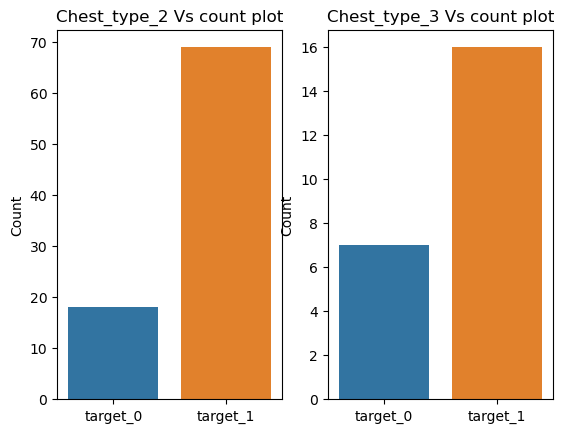

In [21]:
target_0=len(df[(df.cp==2)&(df.target==0)])
target_1=len(df[(df.cp==2)&(df.target==1)])
plt.subplot(1,2,1)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_2 Vs count plot")


target_0=len(df[(df.cp==3)&(df.target==0)])
target_1=len(df[(df.cp==3)&(df.target==1)])
plt.subplot(1,2, 2)
sns.barplot(x=["target_0","target_1"],y=[target_0,target_1])
plt.ylabel("Count")
plt.title("Chest_type_3 Vs count plot")

#### How are Age and Cholestrol related?

To explore this we will find the average cholestrol for each age.  

These are the steps: 

1) Find the unique values that Age takes and then we will count the occurrences of each value. 

Let's say that Age m occurs twice. Let's say for one value of m, the cholestrol is 100 and for another value of m, it is 150. Then the average cholestrol for Age m is (100+150)/2 = 125.

2) Find cholestrol values for each age and then compute the average cholestrol based on the occurrence of that particular age. 

In [22]:
print("Unique values in Age:")
print(df.age.unique())

Unique values in Age:
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


In [23]:
print(df.age.value_counts())

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64


In [24]:
print(df[['age', 'chol']])

     age  chol
0     63   233
1     37   250
2     41   204
3     56   236
4     57   354
..   ...   ...
298   57   241
299   45   264
300   68   193
301   57   131
302   57   236

[303 rows x 2 columns]


In [25]:
print(sorted(df.age.unique()))

age_chol_values=df.groupby('age')['chol'].count().values

print(age_chol_values)

[29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]
[ 1  2  4  2  3  4  3 10  8  8 11  8  7  5  7  5  7 12 13  8 16  8 11 17
 19 14 11  8 11  9 10  8  7  9  4  3  4  3  1  1  1]


#### Let's find the rows where the age=29 and age=34 and let's manually compute the average cholestrol for these ages

In [26]:
# obtaining the rows where the age =29
print(df.loc[df['age']==29])

print(df.loc[df['age']==34])


    age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
72   29       1   1       130   204    0        0      202      0      0.0   

    slope  ca  thal  target  
72      2   0     2       1  
     age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
58    34       1   3       118   182    0        0      174      0      0.0   
125   34       0   1       118   210    0        1      192      0      0.7   

     slope  ca  thal  target  
58       2   0     2       1  
125      2   0     2       1  


##### Manual compution from the above cell

Only one row has age = 29, chol = 204

Since two rows have age=34, average chol = (182+210)/2 = 392/2 = 196


In [27]:
"""
Exploring relationship between age and cholestrol.
"""

age_unique=sorted(df.age.unique())
print("age_unique")
print(age_unique)

print("+++++++++++++++++")
age_chol_values=df.groupby('age')['chol'].count().values

print("age_chol_values")
print(age_chol_values)

mean_chol=[]

for i, age in enumerate(age_unique):
    mean_chol.append(sum(df[df['age']==age].chol)/age_chol_values[i])
    
print("mean chol")
print(mean_chol)

age_unique
[29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]
+++++++++++++++++
age_chol_values
[ 1  2  4  2  3  4  3 10  8  8 11  8  7  5  7  5  7 12 13  8 16  8 11 17
 19 14 11  8 11  9 10  8  7  9  4  3  4  3  1  1  1]
mean chol
[204.0, 196.0, 213.75, 232.5, 193.66666666666666, 239.75, 196.33333333333334, 220.7, 246.75, 256.75, 221.36363636363637, 247.375, 230.28571428571428, 246.4, 250.85714285714286, 228.6, 227.0, 258.6666666666667, 228.23076923076923, 233.5, 253.3125, 280.625, 259.3636363636364, 238.52941176470588, 254.52631578947367, 239.85714285714286, 245.54545454545453, 243.75, 256.6363636363636, 258.22222222222223, 274.4, 279.0, 245.71428571428572, 286.77777777777777, 238.75, 242.33333333333334, 252.5, 238.66666666666666, 269.0, 197.0, 304.0]


In [28]:
print(type(mean_chol))
print(list(age_unique))

df_age_chol = pd.DataFrame([age_unique, mean_chol])


print(df_age_chol)

<class 'list'>
[29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]
      0      1       2      3           4       5           6      7       8   \
0   29.0   34.0   35.00   37.0   38.000000   39.00   40.000000   41.0   42.00   
1  204.0  196.0  213.75  232.5  193.666667  239.75  196.333333  220.7  246.75   

       9   ...     31          32          33      34          35     36  \
0   43.00  ...   65.0   66.000000   67.000000   68.00   69.000000   70.0   
1  256.75  ...  279.0  245.714286  286.777778  238.75  242.333333  252.5   

           37     38     39     40  
0   71.000000   74.0   76.0   77.0  
1  238.666667  269.0  197.0  304.0  

[2 rows x 41 columns]


### Plotting Age vs Cholestrol

C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


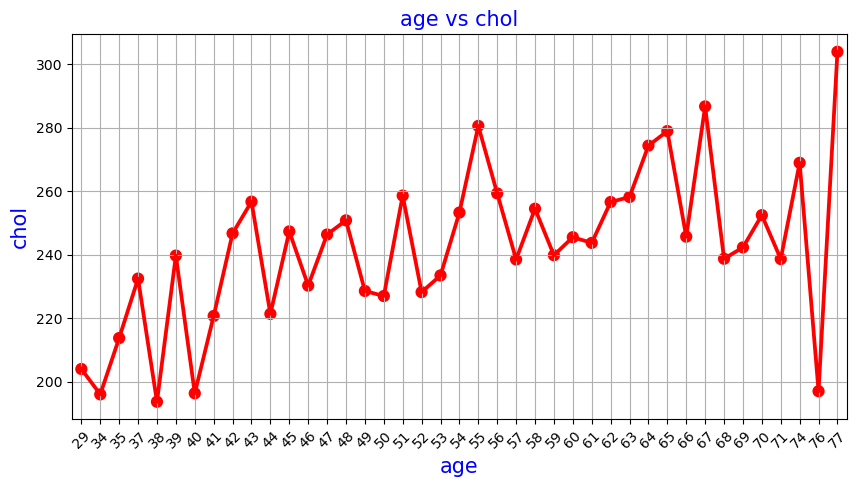

In [29]:
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_chol,color='red')
plt.xlabel('age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('chol',fontsize = 15,color='blue')
plt.title('age vs chol',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [30]:
print(df.cp.unique())

[3 2 1 0]


In [31]:
print(df.thal.unique())

[1 2 3 0]


In [32]:
print(df.slope.unique())

[0 2 1]


In [33]:
# xn is a data frame that only contains colmns with numerical values

xn = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]

In [34]:
# xc contains only catergorical columns

xc = df.drop(["age", "trestbps", "chol", "thalach", "oldpeak", "target"], axis=1)

In [35]:
y = df["target"]

In [36]:
print(xn.shape)

print(xc.shape)

(303, 5)
(303, 8)


In [37]:
# building a correlation matrix for numerical columns

xn.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


In [38]:
# concatenating xn and xc

x = pd.concat([xn, xc], axis=1)

In [39]:
print(x.head())

   age  trestbps  chol  thalach  oldpeak  gender  cp  fbs  restecg  exang  \
0   63       145   233      150      2.3       1   3    1        0      0   
1   37       130   250      187      3.5       1   2    0        1      0   
2   41       130   204      172      1.4       0   1    0        0      0   
3   56       120   236      178      0.8       1   1    0        1      0   
4   57       120   354      163      0.6       0   0    0        1      1   

   slope  ca  thal  
0      0   0     1  
1      0   0     2  
2      2   0     2  
3      2   0     2  
4      2   0     2  


#### Gini Impurity 

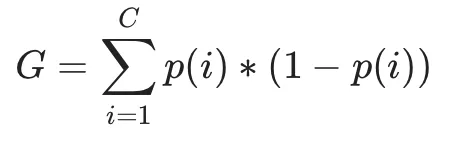

Here C is the number of classes and $i$ is the selected class out of C and $p_i$ is the probability of one of the class, so 

Reference: 

https://towardsdatascience.com/under-the-hood-using-gini-impurity-to-your-advantage-in-decision-tree-classifiers-9be030a650d5


In [40]:
from sklearn.model_selection import train_test_split

In [42]:
"""
Decision Tree
"""
from sklearn.tree import DecisionTreeClassifier

xdr_train, xdr_test, ydr_train, ydr_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [43]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(xdr_train, ydr_train)   

DecisionTreeClassifier(criterion='entropy')

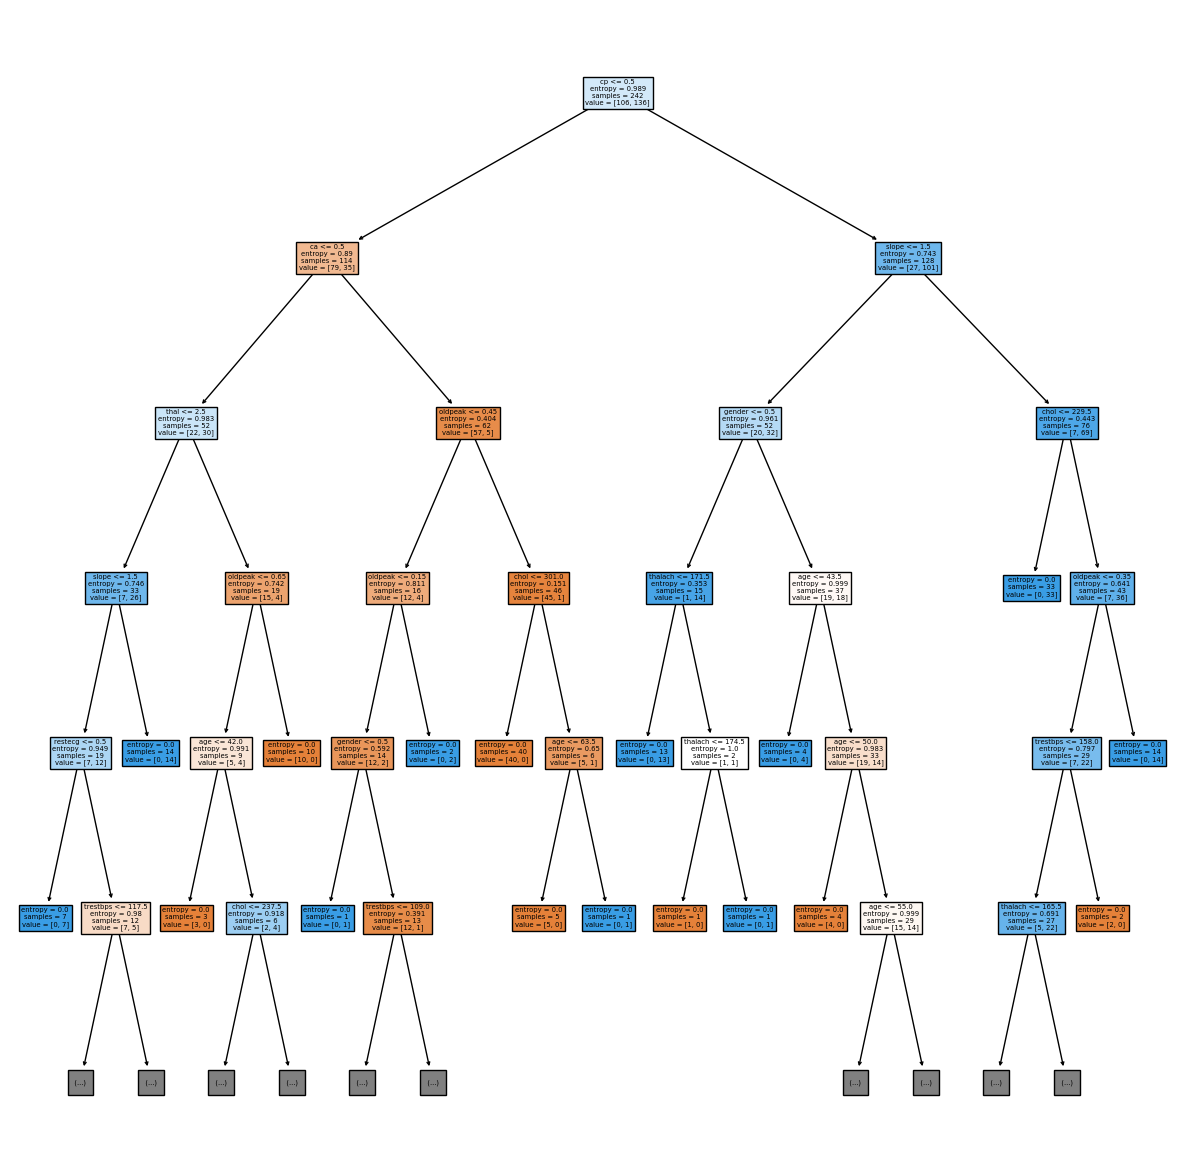

In [49]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(dtree,
feature_names = list(xdr_train.columns),filled = True, max_depth = 5);


In [44]:
print(xdr_train[0:5])
print(ydr_train[0:5])

     age  trestbps  chol  thalach  oldpeak  gender  cp  fbs  restecg  exang  \
237   60       140   293      170      1.2       1   0    0        0      0   
106   69       160   234      131      0.1       1   3    1        0      0   
10    54       140   239      160      1.2       1   0    0        1      0   
153   66       146   278      152      0.0       0   2    0        0      0   
77    59       140   221      164      0.0       1   1    0        1      1   

     slope  ca  thal  
237      1   2     3  
106      1   1     2  
10       2   0     2  
153      1   1     2  
77       2   0     2  
237    0
106    1
10     1
153    1
77     1
Name: target, dtype: int64


In [45]:
print(xdr_test[0:5])

print(ydr_test[0:5]) # true y from the test set

     age  trestbps  chol  thalach  oldpeak  gender  cp  fbs  restecg  exang  \
99    53       130   246      173      0.0       1   2    1        0      0   
296   63       124   197      136      0.0       0   0    0        1      1   
89    58       100   248      122      1.0       0   0    0        0      0   
30    41       105   198      168      0.0       0   1    0        1      0   
234   70       130   322      109      2.4       1   0    0        0      0   

     slope  ca  thal  
99       2   3     2  
296      1   0     2  
89       1   0     2  
30       2   1     2  
234      1   3     2  
99     1
296    0
89     1
30     1
234    0
Name: target, dtype: int64


In [46]:
predict=dtree.predict(xdr_test) # predicted y from the x test                              
predict

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ydr_test, predict))


from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(ydr_test, predict )

print(cm_tree)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

[[24  8]
 [ 3 26]]


In [54]:
#!pip install --upgrade scikit-learn

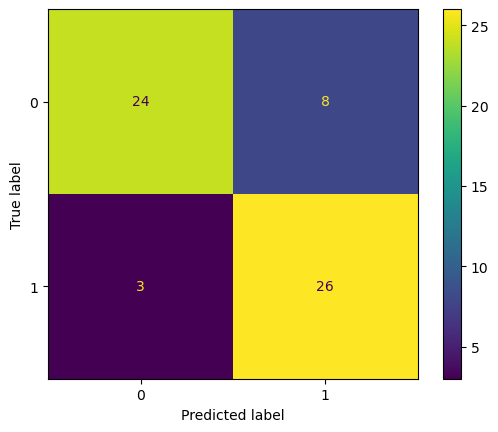

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(ydr_test, predict, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()
plt.show()

In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy is:", accuracy_score(ydr_test, predict)*100)    
# HERE WE ARE GETTING OUR ACCURACY OF OUR MODEL

Accuracy is: 81.9672131147541


## Random Forest Model

In [51]:
"""
Random Forest
"""
from sklearn.ensemble import RandomForestClassifier

In [52]:
# instance of RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(xdr_train, ydr_train)

RandomForestClassifier()

In [53]:
rfc_predict = rfc.predict(xdr_test)                                

In [54]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(ydr_test, rfc_predict)

print(cm_rf)
print(classification_report(ydr_test, rfc_predict))

[[24  8]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        32
           1       0.78      1.00      0.88        29

    accuracy                           0.87        61
   macro avg       0.89      0.88      0.87        61
weighted avg       0.90      0.87      0.87        61



In [55]:
print("Accuracy is:", accuracy_score(ydr_test,rfc_predict)*100)    

Accuracy is: 86.88524590163934


In [56]:
# Printing all confusion matrices and accuracies

print("Confusion matrix for decision tree")

print(cm_tree)
print("Accuracy for decision tree:", accuracy_score(ydr_test,predict)*100)


print("Confusion matrix for random forest")
print(cm_rf)
print("Accuracy for random forest:",accuracy_score(ydr_test,rfc_predict)*100)    

Confusion matrix for decision tree
[[24  8]
 [ 3 26]]
Accuracy for decision tree: 81.9672131147541
Confusion matrix for random forest
[[24  8]
 [ 0 29]]
Accuracy for random forest: 86.88524590163934


In-class activity: Can you build Random Forest Classifiers with 200 and 300 trees and 
find the accuracy score for each model?

In-class activity: What are the accuracies if we have 50 and 150 trees?